In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/laptops.csv')

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df_fil = df[['ram', 'storage', 'screen', 'final_price']]

df_fil.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


## EDA

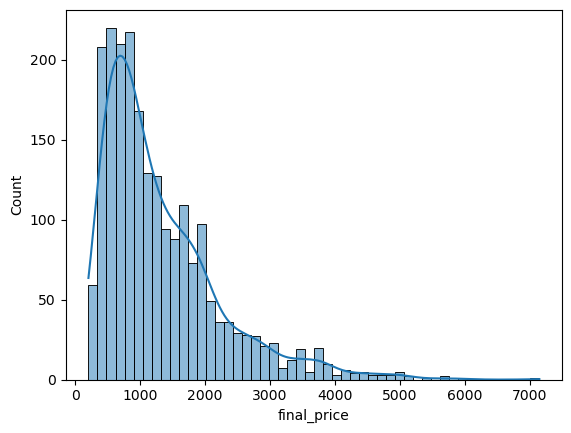

In [6]:
sns.histplot(df_fil.final_price, bins=50, kde=True)
plt.show()

## Question 1

There's one column with missing values. What is it?

In [7]:
df_fil.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

R/ screen

## Question 2

What's the median (50% percentile) for variable 'ram'?

In [8]:
df_fil.ram.median()

16.0

R/ 16

Prepare and split the dataset:

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [9]:
df_fil.shape

(2160, 4)

In [10]:
n = len(df_fil)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n, n_val+n_test+n_train

(2160, 2160)

In [12]:
idx = np.arange(n)

In [13]:
np.random.seed(42)
np.random.shuffle(idx)



In [14]:
df_train = df_fil.iloc[idx[:n_train]]
df_val = df_fil.iloc[idx[n_train:n_train+n_val]]
df_test = df_fil.iloc[idx[n_train+n_val:]]

In [15]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [16]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

## Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

**Options:**
* With 0
* With mean
* Both are equally good

In [17]:
df_train

,ram,storage,screen
2079,32,1000,15.6
668,4,64,14.1
2073,32,1000,14.0
1113,16,512,13.3
788,32,1000,16.0
...,...,...,...
1777,8,256,14.0
183,32,1000,16.0
137,16,512,15.6
899,16,512,14.0


### Liner Regression - computing with 0

In [18]:
def prepare_X_with_0(df):
    df = df.fillna(0)
    X = df.values
    return X

In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [20]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [21]:
X_train_0 = prepare_X_with_0(df_train)
X_val_0 = prepare_X_with_0(df_val)

In [22]:

w0, w = train_linear_regression(X_train_0, y_train)


y_pred = w0 + X_val_0.dot(w)

score_with_0 = rmse(y_val, y_pred)
    
print('rmse_with_0:', {score_with_0})

rmse_with_0: {0.42886353154744117}


### Liner Regression - computing with mean

In [23]:
df_fil.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [24]:
mean = df_train.screen.mean()

In [25]:
def prepare_X_with_mean(df):
    df = df.fillna(value=mean)
    X = df.values
    return X

In [26]:
X_train_mean = prepare_X_with_mean(df_train)
X_val_mean = prepare_X_with_mean(df_val)

In [27]:

w0, w = train_linear_regression(X_train_mean, y_train)


y_pred = w0 + X_val_mean.dot(w)

score_with_mean = rmse(y_val, y_pred)
    
print('rmse_with_mean:', {score_with_mean})

rmse_with_mean: {0.4311767801693913}


In [28]:
round(score_with_0, 2),  round(score_with_mean, 2)

(0.43, 0.43)

## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

Options:

* 0
* 0.01
* 1
* 10
* 100

In [29]:
def train_linear_regression_regularization(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    
    # Regularization
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [30]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X_with_0(df_train)
    w0, w = train_linear_regression_regularization(X_train, y_train, r=r)

    X_val = prepare_X_with_0(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print('r:', {r},  'rmse:', {round(score, 2)})

r: {0} rmse: {0.43}
r: {0.01} rmse: {0.43}
r: {0.1} rmse: {0.43}
r: {1} rmse: {0.43}
r: {5} rmse: {0.46}
r: {10} rmse: {0.51}
r: {100} rmse: {0.67}


In [31]:
list = [0, 0.01, 0.1, 1]

print(min(list))

0


## Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

* 19.176
* 29.176
* 39.176
* 49.176

In [32]:
def prepare_data_for_model(df_fil, seed_values=[0, 1]):
    n = len(df_fil)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    for seed_val in seed_values:
        idx = np.arange(n)
        np.random.seed(seed_val)
        np.random.shuffle(idx)
        
        globals()[f'df_train_seed_{seed_val}'] = df_fil.iloc[idx[:n_train]].copy()
        globals()[f'df_val_seed_{seed_val}'] = df_fil.iloc[idx[n_train:n_train+n_val]].copy()
        globals()[f'df_test_seed_{seed_val}'] = df_fil.iloc[idx[n_train+n_val:]].copy()
        
        globals()[f'y_train_seed_{seed_val}'] = globals()[f'df_train_seed_{seed_val}'].final_price.values
        globals()[f'y_val_seed_{seed_val}'] = globals()[f'df_val_seed_{seed_val}'].final_price.values
        globals()[f'y_test_seed_{seed_val}'] = globals()[f'df_test_seed_{seed_val}'].final_price.values
        
        del globals()[f'df_train_seed_{seed_val}']['final_price']
        del globals()[f'df_val_seed_{seed_val}']['final_price']
        del globals()[f'df_test_seed_{seed_val}']['final_price']
    
    print("Dataframes y arrays creados:")
    for seed_val in seed_values:
        for split in ['train', 'val', 'test']:
            df_name = f'df_{split}_seed_{seed_val}'
            y_name = f'y_{split}_seed_{seed_val}'
            print(f"  {df_name}: {globals()[df_name].shape}, {y_name}: {globals()[y_name].shape}")


In [33]:
prepare_data_for_model(df_fil, seed_values=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Dataframes y arrays creados:
  df_train_seed_0: (1296, 3), y_train_seed_0: (1296,)
  df_val_seed_0: (432, 3), y_val_seed_0: (432,)
  df_test_seed_0: (432, 3), y_test_seed_0: (432,)
  df_train_seed_1: (1296, 3), y_train_seed_1: (1296,)
  df_val_seed_1: (432, 3), y_val_seed_1: (432,)
  df_test_seed_1: (432, 3), y_test_seed_1: (432,)
  df_train_seed_2: (1296, 3), y_train_seed_2: (1296,)
  df_val_seed_2: (432, 3), y_val_seed_2: (432,)
  df_test_seed_2: (432, 3), y_test_seed_2: (432,)
  df_train_seed_3: (1296, 3), y_train_seed_3: (1296,)
  df_val_seed_3: (432, 3), y_val_seed_3: (432,)
  df_test_seed_3: (432, 3), y_test_seed_3: (432,)
  df_train_seed_4: (1296, 3), y_train_seed_4: (1296,)
  df_val_seed_4: (432, 3), y_val_seed_4: (432,)
  df_test_seed_4: (432, 3), y_test_seed_4: (432,)
  df_train_seed_5: (1296, 3), y_train_seed_5: (1296,)
  df_val_seed_5: (432, 3), y_val_seed_5: (432,)
  df_test_seed_5: (432, 3), y_test_seed_5: (432,)
  df_train_seed_6: (1296, 3), y_train_seed_6: (1296,)
  df_

In [34]:
def prepare_X_with_0(df):
    df = df.fillna(0)
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

def evaluate_model_multiple_seeds(seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    scores = []
    
    for seed in seeds:
        # Preparar datos
        X_train = prepare_X_with_0(globals()[f'df_train_seed_{seed}'])
        X_val = prepare_X_with_0(globals()[f'df_val_seed_{seed}'])
        y_train = globals()[f'y_train_seed_{seed}']
        y_val = globals()[f'y_val_seed_{seed}']
        
        # Entrenar modelo
        w0, w = train_linear_regression(X_train, y_train)
        
        # Predecir y evaluar
        y_pred = w0 + X_val.dot(w)
        score = rmse(y_val, y_pred)
        scores.append(score)
        
        print(f'RMSE for seed {seed}: {score}')
    
    # Calcular desviación estándar
    std_dev = np.std(scores)
    std_dev_rounded = round(std_dev, 3)
    
    print(f'\nStandard deviation of RMSE scores: {std_dev_rounded}')
    
    return std_dev_rounded

In [35]:
std_dev = evaluate_model_multiple_seeds()

RMSE for seed 0: 565.4520868770995
RMSE for seed 1: 636.7985423056726
RMSE for seed 2: 588.955869790796
RMSE for seed 3: 597.8148920012515
RMSE for seed 4: 571.962791511103
RMSE for seed 5: 573.238325661895
RMSE for seed 6: 647.3438328407194
RMSE for seed 7: 550.4398184485962
RMSE for seed 8: 587.3335036169963
RMSE for seed 9: 576.101792943313

Standard deviation of RMSE scores: 29.176


In [36]:
# Lista para almacenar los scores RMSE
rmse_scores = []

# Iterar sobre las semillas
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Preparar los datos
    X_train_0 = prepare_X_with_0(globals()[f'df_train_seed_{seed}'])
    X_val_0 = prepare_X_with_0(globals()[f'df_val_seed_{seed}'])
    y_train = globals()[f'y_train_seed_{seed}']
    y_val = globals()[f'y_val_seed_{seed}']

    # Entrenar el modelo
    w0, w = train_linear_regression(X_train_0, y_train)

    # Hacer predicciones
    y_pred = w0 + X_val_0.dot(w)

    # Calcular RMSE
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    
    print(f'RMSE para semilla {seed}: {score}')

RMSE para semilla 0: 565.4520868770995
RMSE para semilla 1: 636.7985423056726
RMSE para semilla 2: 588.955869790796
RMSE para semilla 3: 597.8148920012515
RMSE para semilla 4: 571.962791511103
RMSE para semilla 5: 573.238325661895
RMSE para semilla 6: 647.3438328407194
RMSE para semilla 7: 550.4398184485962
RMSE para semilla 8: 587.3335036169963
RMSE para semilla 9: 576.101792943313


In [37]:
std_rmse = np.std(rmse_scores)
std_rmse_rounded = round(std_rmse, 3)

print(f'Desviación estándar de los scores RMSE: {std_rmse_rounded}')

Desviación estándar de los scores RMSE: 29.176


## Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 598.60
* 608.60
* 618.60
* 628.60

In [38]:
n = len(df_fil)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_val+n_test+n_train
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)


df_train = df_fil.iloc[idx[:n_train]]
df_val = df_fil.iloc[idx[n_train:n_train+n_val]]
df_test = df_fil.iloc[idx[n_train+n_val:]]
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [39]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,ram,storage,screen
0,32,1000,15.6
1,8,512,13.3
2,8,512,15.6
3,32,1000,17.3
4,16,1000,16.0
...,...,...,...
1723,16,512,14.0
1724,16,512,13.3
1725,8,256,15.6
1726,16,512,15.6


In [40]:
X_full_train = prepare_X_with_0(df_full_train)

In [41]:
y_full_train = np.concatenate([y_train, y_val])

In [42]:
def train_linear_regression_regularization(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    
    # Regularization
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [43]:
w0, w = train_linear_regression_regularization(X_full_train, y_full_train, r=0.001)

In [44]:
X_test = prepare_X_with_0(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score, 2)

608.61